# Credit Card (EDA, Visualization & Regression Modelling)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.linear_model import Ridge

## Importing and Merging Datasets

In [3]:
df = pd.read_csv("Credit_card.csv",na_values=['nan'])
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [4]:
label = pd.read_csv("Credit_card_label.csv")
label

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


Individual ID is the common column. We are going to merge the dataset with accordance to that column.

In [5]:
df = df.merge(label, on = 'Ind_ID', how= 'left')

In [6]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


## DataFrame Exploration

In [7]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

column describtion: 

**Features name:** (Credit_Card.csv)

**Ind_ID:** Client ID

**Gender:** Gender information

**Car_owner:** Having car or not

**Propert_owner:** Having property or not

**Children:** Count of children

**Annual_income:** Annual income

**Type_Income:** Income type

**Education:** Education level

**Marital_status:** Marital_status

**Housing_type:** Living style

**Birthday_count:** Use backward count from current day (0), -1 means yesterday.

**Employed_days:** Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

**Mobile_phone:** Any mobile phone

**Work_phone:** Any work phone

**Phone:** Any phone number

**EMAIL_ID:** Any email ID

**Type_Occupation:** Occupation

**Family_Members:** Family size

Another data set (Credit_card_label.csv) contains two key pieces of information

**ID:** The joining key between application data and credit status data, same is Ind_ID

**Label:** 0 is application approved and 1 is application rejected.

In [8]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

## Data Cleaning

### Check for NaN Values

In [10]:
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

There are a lot of data missing from the Type_Occupation, where removal of all can impact the model alot. We will drop the Type_Occupation overall and romove the NaN values of from the data.

### Drop Type_Occupation column

In [11]:
df.drop(columns= ('Type_Occupation'), inplace =True)

### Drop NaN columns

In [12]:
df.dropna(inplace = True)

### Check For Duplicates

In [13]:
df.duplicated().sum()

0

## Data Visualization

### Calculate Average Income & Average income by Male/Female

In [14]:
average_income = df['Annual_income'].mean()
average_income

190775.04846256683

In [15]:
gender_average_income = df.groupby('GENDER')['Annual_income'].mean()
gender_average_income

GENDER
F    172391.840021
M    222485.245902
Name: Annual_income, dtype: float64

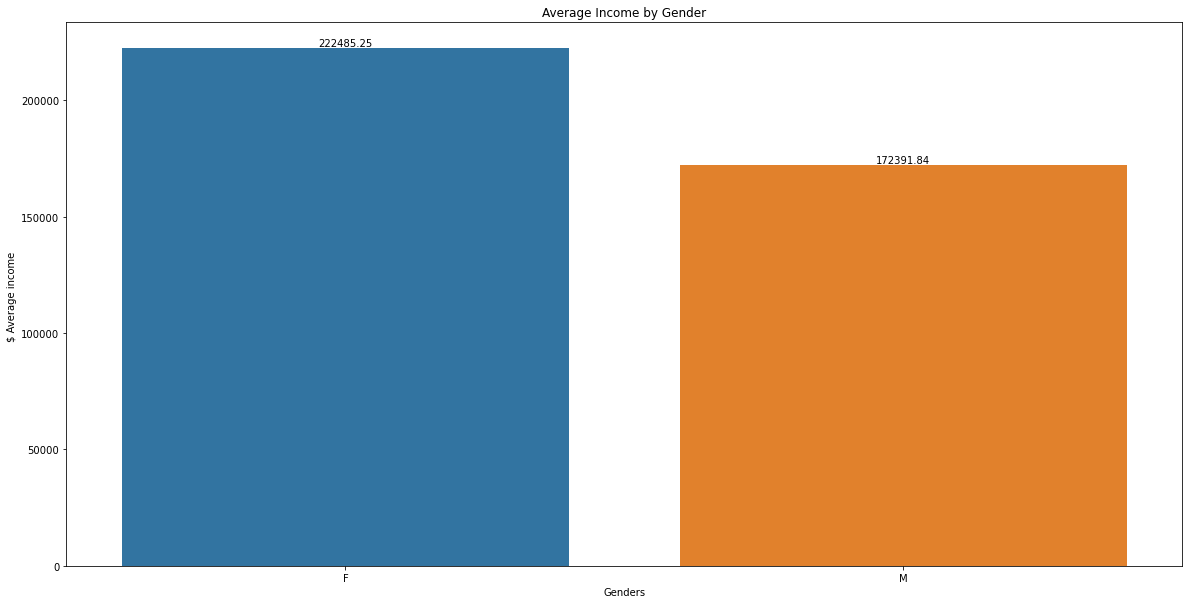

In [16]:
plt.figure(figsize = (20, 10))
p = sns.barplot( x= gender_average_income.index, y= gender_average_income.sort_values(ascending = False))

# Adding values inside the bars
for index, value in enumerate(gender_average_income.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel("Genders")
plt.ylabel("$ Average income ")
plt.title("Average Income by Gender")
plt.show()

### Label Counts

For Labels 0 is application approved and 1 is application rejected

In [17]:
label_counts = df['label'].value_counts()
label_counts

0    1336
1     160
Name: label, dtype: int64

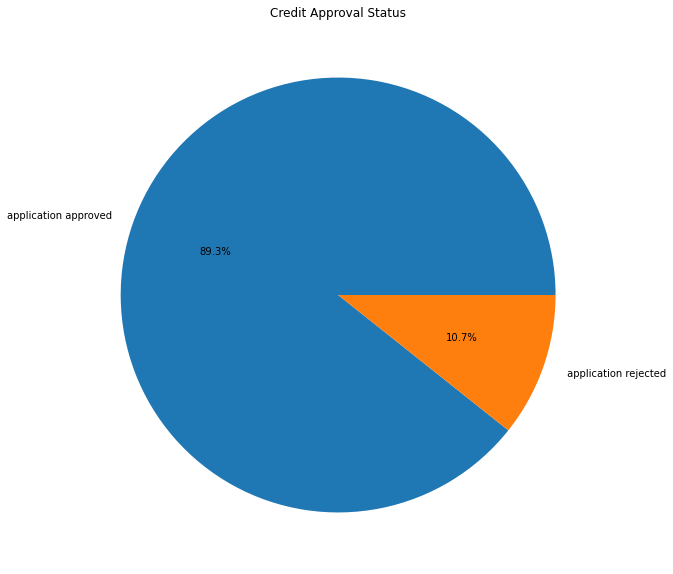

In [18]:
plt.figure(figsize = (20, 10))

ax = label_counts.plot(kind='pie', labels=['application approved',' application rejected'], autopct='%1.1f%%')

plt.title('Credit Approval Status')
plt.ylabel('')

plt.show()

### Heatmap

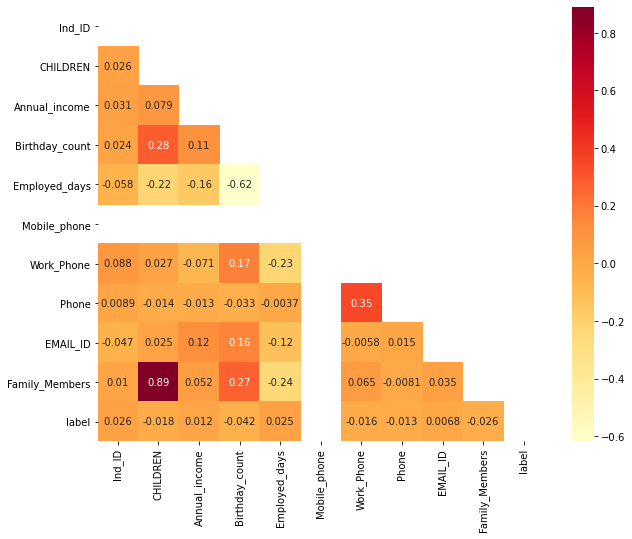

In [19]:
plt.figure(figsize=(10,8))
corr= df[df.describe().columns].corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix,cmap ="YlOrRd");

### BoxPlot

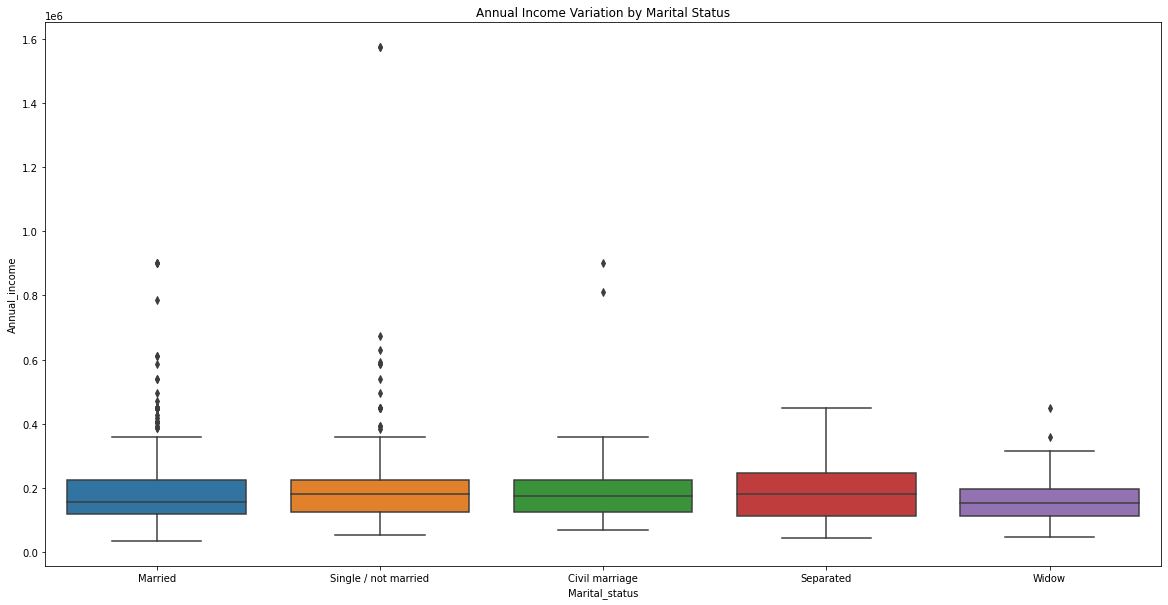

In [20]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = 'Marital_status', y='Annual_income', data=df)

plt.title('Annual Income Variation by Marital Status')
plt.show()

### Violinplot 

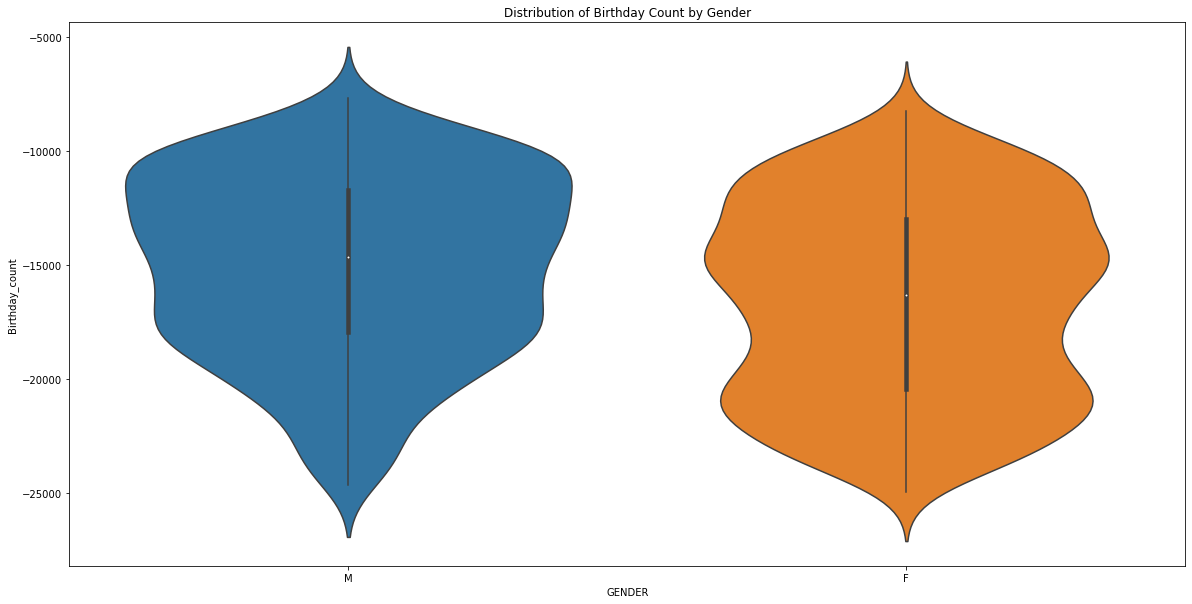

In [21]:
plt.figure(figsize = (20, 10))

sns.violinplot(x= 'GENDER', y= 'Birthday_count', data= df)

plt.title('Distribution of Birthday Count by Gender')

plt.show()

## Comparing the Data By Using Groupby()

### Average Annual Income By Type of Income

In [22]:
Average_income_by_type = df.groupby('Type_Income')['Annual_income'].mean()
Average_income_by_type

Type_Income
Commercial associate    233880.169972
Pensioner               154964.866795
State servant           210130.434783
Working                 180154.579974
Name: Annual_income, dtype: float64

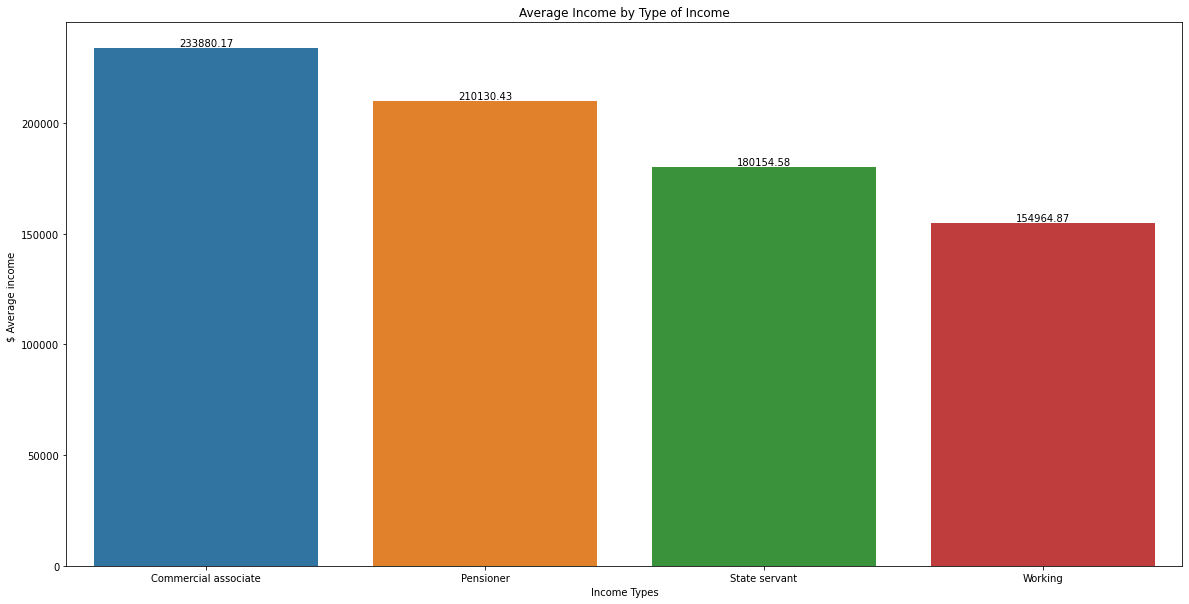

In [23]:
plt.figure(figsize = (20, 10))
p = sns.barplot( x= Average_income_by_type.index, y= Average_income_by_type.sort_values(ascending = False))

# Adding values inside the bars
for index, value in enumerate(Average_income_by_type.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel("Income Types")
plt.ylabel("$ Average income ")
plt.title("Average Income by Type of Income")
plt.show()

### Family Members by Housing Types

In [24]:
Family_Members_by_Housing_Types = df.groupby('Housing_type')['Family_Members'].sum()
Family_Members_by_Housing_Types

Housing_type
Co-op apartment           5
House / apartment      2900
Municipal apartment      92
Office apartment         21
Rented apartment         46
With parents            175
Name: Family_Members, dtype: int64

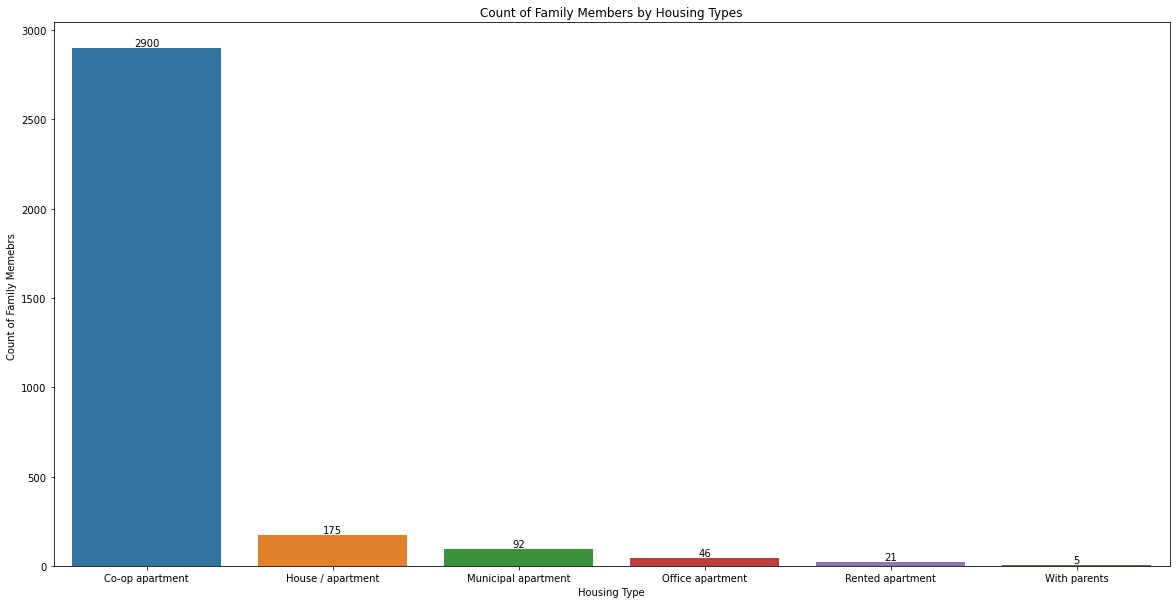

In [25]:
plt.figure(figsize = (20, 10))
p = sns.barplot( x= Family_Members_by_Housing_Types.index, y= Family_Members_by_Housing_Types.sort_values(ascending = False))

# Adding values inside the bars
for index, value in enumerate(Family_Members_by_Housing_Types.sort_values(ascending=False)):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')

plt.xlabel("Housing Type")
plt.ylabel("Count of Family Memebrs ")
plt.title("Count of Family Members by Housing Types")
plt.show()

### Family Members by Martial Status

In [26]:
members_by_martial_status = df.groupby('Marital_status')['Family_Members'].sum()
members_by_martial_status

Marital_status
Civil marriage           243
Married                 2521
Separated                131
Single / not married     263
Widow                     81
Name: Family_Members, dtype: int64

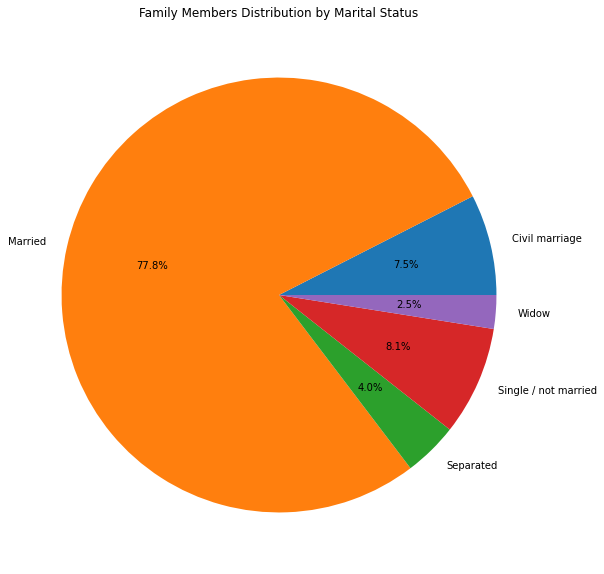

In [27]:
plt.figure(figsize = (20, 10))

ax = members_by_martial_status.plot(kind='pie', autopct='%1.1f%%')

plt.title('Family Members Distribution by Marital Status')
plt.ylabel('')

plt.show()

### Number of Childern and Average Annual Income

In [28]:
Children_annual_income = df.groupby('CHILDREN')['Annual_income'].sum()
Children_annual_income

CHILDREN
0     191703172.5
1      64218600.0
2      26226900.0
3       2845800.0
4        180000.0
14       225000.0
Name: Annual_income, dtype: float64

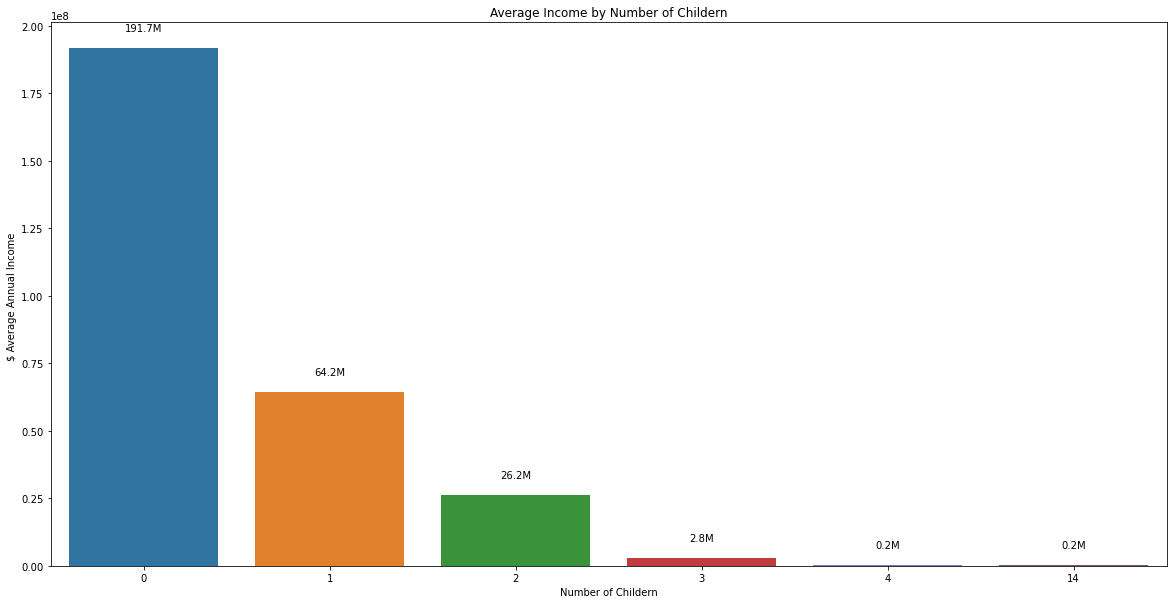

In [29]:
plt.figure(figsize = (20, 10))
p = sns.barplot( x= Children_annual_income.index, y= Children_annual_income.sort_values(ascending = False))

for b in p.patches:
    p.annotate(str(round(b.get_height() / 1e6, 1)) + 'M',
    (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6),
    ha='center', va='bottom',
    xytext=(0, 12),  # Adjusted to move the labels above the bars
    textcoords='offset points')

plt.xlabel("Number of Childern")
plt.ylabel("$ Average Annual Income ")
plt.title("Average Income by Number of Childern")
plt.show()


## Preprocessing and Feature Engineering

In [30]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label'],
      dtype='object')

In [31]:
### Target Values 

In [32]:
df = df[['GENDER','Car_Owner','Propert_Owner','CHILDREN','Type_Income','Marital_status','Housing_type','Annual_income','EDUCATION','label']]

In [33]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Type_Income,Marital_status,Housing_type,Annual_income,EDUCATION,label
0,M,Y,Y,0,Pensioner,Married,House / apartment,180000.0,Higher education,1
1,F,Y,N,0,Commercial associate,Married,House / apartment,315000.0,Higher education,1
4,F,Y,N,0,Commercial associate,Married,House / apartment,315000.0,Higher education,1
6,F,Y,N,0,Commercial associate,Married,House / apartment,315000.0,Higher education,1
7,F,N,N,0,Pensioner,Married,House / apartment,180000.0,Secondary / secondary special,1


### Label Encoding

In [34]:
labelencoder = preprocessing.LabelEncoder()

In [35]:
df['GENDER'] = labelencoder.fit_transform(df['GENDER'])
df['Car_Owner'] = labelencoder.fit_transform(df['Car_Owner'])
df['Propert_Owner'] = labelencoder.fit_transform(df['Propert_Owner'])
df['Type_Income'] = labelencoder.fit_transform(df['Type_Income'])
df['EDUCATION'] = labelencoder.fit_transform(df['EDUCATION'])
df['Marital_status'] = labelencoder.fit_transform(df['Marital_status'])
df['Housing_type'] = labelencoder.fit_transform(df['Housing_type'])




<ipython-input-35-19d39f569b23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENDER'] = labelencoder.fit_transform(df['GENDER'])
<ipython-input-35-19d39f569b23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car_Owner'] = labelencoder.fit_transform(df['Car_Owner'])
<ipython-input-35-19d39f569b23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [36]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Type_Income,Marital_status,Housing_type,Annual_income,EDUCATION,label
0,1,1,1,0,1,1,1,180000.0,1,1
1,0,1,0,0,0,1,1,315000.0,1,1
4,0,1,0,0,0,1,1,315000.0,1,1
6,0,1,0,0,0,1,1,315000.0,1,1
7,0,0,0,0,1,1,1,180000.0,4,1


## Model

In [37]:
X = df.iloc[:, :-1]

In [38]:
y= df['label']

### Train Test Split 80/20

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 42)

### Model Results Predection

In [40]:
def modelresults(predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print('Mean absolute error on model is {:.4f}'.format(mae))
    print('')
    print('Mean squared error on model is {:.4f}'.format(mse))
    print('')
    print('The r2 score on model is {:.4f}'.format(r2))

### Linear Regression

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(X_test)

In [44]:
modelresults(y_pred)

Mean absolute error on model is 0.1823

Mean squared error on model is 0.0847

The r2 score on model is -0.0012


## Random Forest model

In [45]:
rfr = RandomForestRegressor(random_state = 42)

In [46]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
y_pred2 =rfr.predict(X_test)

In [48]:
modelresults(y_pred2)

Mean absolute error on model is 0.1672

Mean squared error on model is 0.0889

The r2 score on model is -0.0500


### Ridge Regression

In [49]:
ridge = Ridge()

In [50]:
param_grid_ridge = {
    'alpha' : [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 10, 15, 30, 50, 75],
}

In [51]:
ridge_cv =GridSearchCV(ridge, param_grid_ridge, cv=5, n_jobs = -1, scoring='neg_mean_squared_error')

In [52]:
%%time
ridge_cv.fit(X_train, y_train)

Wall time: 2.31 s


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 10, 15, 30,
                                   50, 75]},
             scoring='neg_mean_squared_error')

In [53]:
### The alpha value that worked the best
ridge_cv.best_estimator_

Ridge(alpha=75)

In [54]:
y_pred3 =ridge_cv.predict(X_test)

In [55]:
modelresults(y_pred3)

Mean absolute error on model is 0.1825

Mean squared error on model is 0.0849

The r2 score on model is -0.0032


### Gradient Boosting Regression

In [56]:
gbr = GradientBoostingRegressor()

In [57]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [58]:
y_pred4 = gbr.predict(X_test)

In [59]:
modelresults(y_pred4)

Mean absolute error on model is 0.1704

Mean squared error on model is 0.0844

The r2 score on model is 0.0023


### Stacking Regressing Model

In [60]:
estimators = [
    ('lr', lr),
    ('ridge',ridge_cv.best_estimator_),
    ('gbr',gbr),
]

In [61]:
sr = StackingRegressor(
    estimators = estimators,
    final_estimator = rfr
)

In [62]:
sr.fit(X_train,y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('ridge', Ridge(alpha=75)),
                              ('gbr', GradientBoostingRegressor())],
                  final_estimator=RandomForestRegressor(random_state=42))

In [63]:
y_pred5 = sr.predict(X_test)

In [64]:
modelresults(y_pred4)

Mean absolute error on model is 0.1704

Mean squared error on model is 0.0844

The r2 score on model is 0.0023


Model Comparison

Among the models evaluated, the Random Forest model achieved the lowest Mean Absolute Error (MAE) of 0.1672, indicating better predictive accuracy.

However, it's important to note that all models exhibit relatively similar performance, with R-squared scores close to zero, suggesting that the models struggle to explain the variance in the target variable.

### Hyperparameter Tuning

In [66]:
estimators2 = [
    ('ridge',ridge_cv.best_estimator_),
    ('gbr',gbr)
]

In [67]:
sr3 = StackingRegressor(
    estimators = estimators2,
    final_estimator = Ridge(alpha = 1.0)
)

In [68]:
param_grid_sr= {
    'final_estimator__alpha': [0.1,1.0,10.0]
    
}

In [69]:
sr_cv = RandomizedSearchCV(sr3, param_grid_sr, n_iter = 5, cv=3, scoring='neg_mean_squared_error' )


In [70]:
%%time
sr_cv.fit(X_train, y_train)

C:\Users\enaba\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Wall time: 3.22 s


RandomizedSearchCV(cv=3,
                   estimator=StackingRegressor(estimators=[('ridge',
                                                            Ridge(alpha=75)),
                                                           ('gbr',
                                                            GradientBoostingRegressor())],
                                               final_estimator=Ridge()),
                   n_iter=5,
                   param_distributions={'final_estimator__alpha': [0.1, 1.0,
                                                                   10.0]},
                   scoring='neg_mean_squared_error')

In [71]:
y_pred6 = sr_cv.predict(X_test)

In [72]:
modelresults(y_pred6)

Mean absolute error on model is 0.1785

Mean squared error on model is 0.0835

The r2 score on model is 0.0134
